# Aula 4.8 – Detectando e Tratando Outliers

## ⚠️ Quando os outliers são problema?

- Quando distorcem médias e variâncias
- Quando afetam visualizações
- Quando impactam algoritmos de machine learning

⚠️ Nem todo outlier deve ser removido! Às vezes, ele é o dado mais importante.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulando uma base com outliers
np.random.seed(0)
df = pd.DataFrame({
    'gastos': np.append(np.random.normal(500, 50, 100), [1200, 1300, 1500])
})
df.head()

,gastos
0,588.202617
1,520.007860
2,548.936899
3,612.044660
4,593.377900


## 📊 Detectando com IQR (Intervalo Interquartílico)

O IQR mostra onde está a parte mais “confiável” dos seus dados.
A gente usa ele para:

*   Saber o tamanho do miolo da distribuição
*   Detectar outliers (valores fora do padrão)


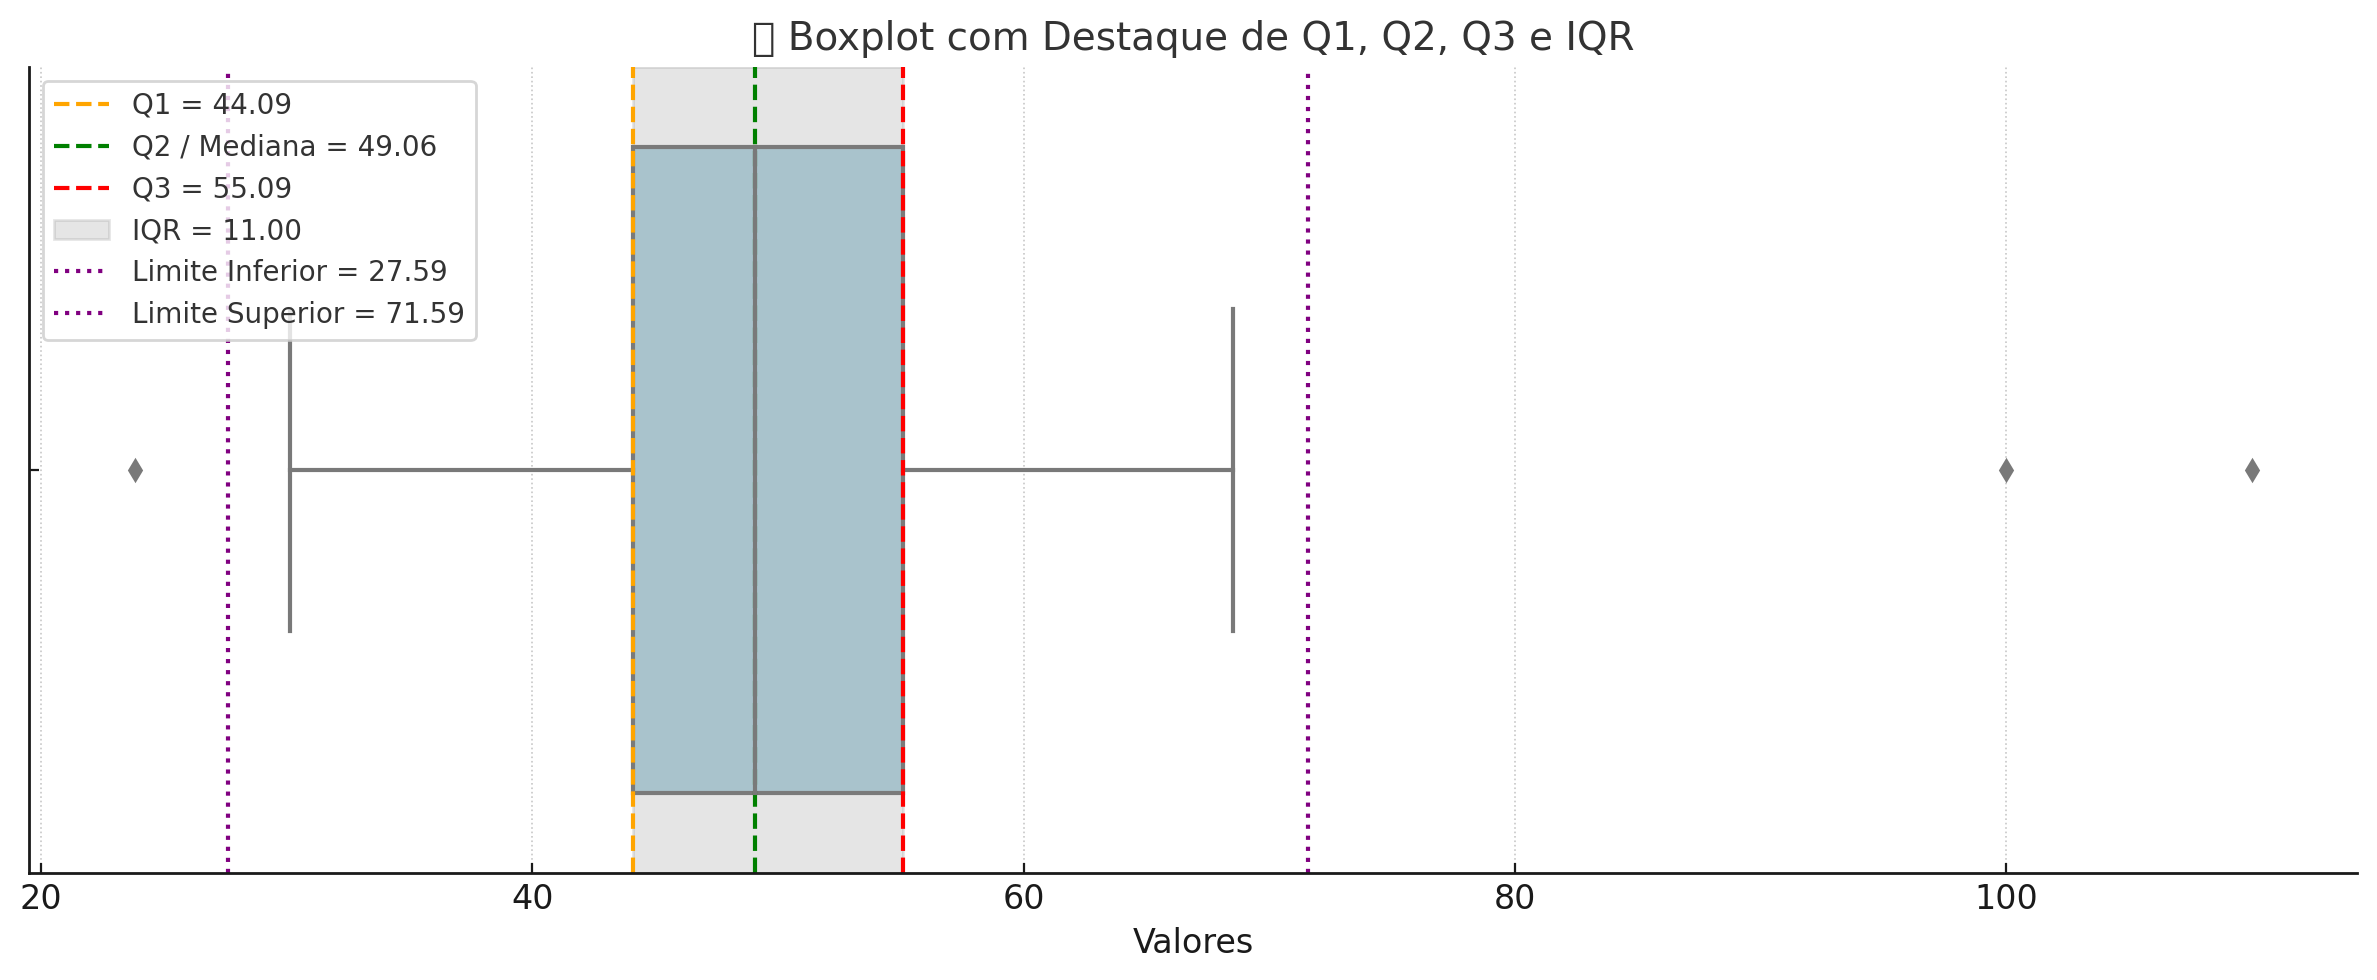


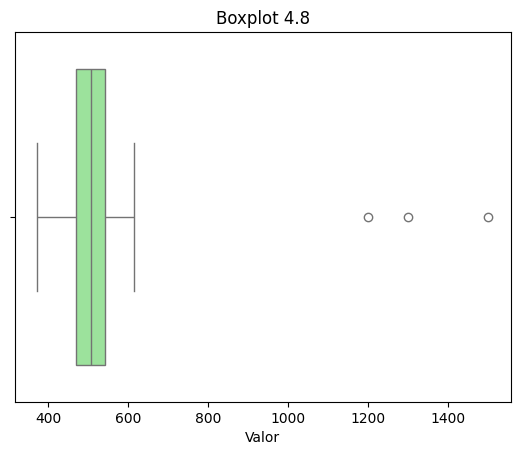

In [4]:
sns.boxplot(x=df['gastos'], color='lightgreen')
plt.title('Boxplot 4.8')
plt.xlabel('Valor')
plt.show()


In [2]:
Q1 = df['gastos'].quantile(0.25)
Q3 = df['gastos'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_iqr = df[(df['gastos'] < limite_inferior) | (df['gastos'] > limite_superior)]
print(f"Total de outliers detectados: {len(outliers_iqr)}")
outliers_iqr

Total de outliers detectados: 3


,gastos
100,1200.0
101,1300.0
102,1500.0


## 🧠 Detectando com Z-Score

Z-score é uma medida que mostra o quão longe um valor está da média, usando o desvio padrão como referência.

    Em outras palavras: o Z-score transforma os dados em uma régua padronizada.

Imagine que você está numa sala com pessoas e quer saber quem está muito acima ou abaixo da média de altura.

*   A média da sala é 1.70m
*   O desvio padrão (a média de variação) é 0.10m
*   Uma pessoa mede 1.90m

Então:

    Z-score = (1.90 - 1.70) / 0.10 = 2

Ou seja, essa pessoa está 2 desvios acima da média.


> 👉 **Na prática, se um valor tem Z > 3 ou Z < -3, ele está muito fora da curva.**

In [5]:
from scipy.stats import zscore

z_scores = zscore(df['gastos'])
outliers_z = df[np.abs(z_scores) > 3]
print(f"Total de outliers com Z-score > 3: {len(outliers_z)}")
outliers_z

Total de outliers com Z-score > 3: 3


,gastos
100,1200.0
101,1300.0
102,1500.0


# 🛠️ Como tratar outliers?

### 1. **Excluir** (quando claramente são erros)
### 2. **Substituir** (ex: por média, mediana, limite)

## 1️⃣ Excluir (dropar) o outlier
📌 Quando usar:
* Quando for claramente um erro
* Quando for muito isolado e não representa um grupo importante
* Quando o volume de dados for alto (e perder 1 ponto não impacta)

❌ Evite excluir:
* Se você tiver poucos dados
* Se o valor for real e relevante para o negócio

⚓ O que é um volume alto de dados?
* < 1%	Pode excluir com tranquilidade (quase sempre erro)
* 1% a 5%	Excluir com justificativa (avaliar impacto)
* 5% a 10%	Avaliar com mais cuidado (talvez substituir)
* '>' 10%	Provavelmente não é outlier — pode indicar outro padrão


> **"Pode excluir se for menos de 5% E não for importante para o negócio."
Sempre pergunte: “Esse dado fora da curva representa alguém ou algo que importa?”**



In [6]:
#Exclusão com IQR

df_excluido = df[(df['gastos'] >= limite_inferior) & (df['gastos'] <= limite_superior)]
print(f"Base após exclusão: {df_excluido.shape[0]} registros")

Base após exclusão: 100 registros


In [7]:
df['gastos'].mean()

np.float64(527.1751463851692)

In [8]:
df_excluido['gastos'].mean()

np.float64(502.9904007767243)

##2️⃣ Substituir o outlier por outro valor
📌 Quando usar:
* Quando precisa manter a estrutura da base (ex: modelos de ML que não aceitam nulos)
* Quando o outlier faz sentido, mas você quer suavizar seu impacto
* Quando é frequente demais para excluir

🔁 Opções de substituição:
* Mediana: ideal para valores assimétricos
* Q1 ou Q3: usar os próprios limites dos quartis

In [13]:
df_substituido = df.copy()
mediana = df['gastos'].median()
df_substituido.loc[(df['gastos'] < limite_inferior) | (df['gastos'] > limite_superior), 'gastos'] = mediana
df_substituido.describe()

,gastos
count,103.000000
mean,503.088125
std,49.900827
min,372.350509
25%,469.670706
50%,506.345605
75%,535.891593
max,613.487731


In [14]:
df.describe()

,gastos
count,103.000000
mean,527.175146
std,150.449867
min,372.350509
25%,469.670706
50%,506.345605
75%,541.048164
max,1500.000000


In [15]:
df_substituido_2 = df.copy()
mediana = df['gastos'].median()
df_substituido_2.loc[df_substituido_2['gastos'] > limite_superior, 'gastos'] = mediana

## 📊 Comparando antes e depois dos tratamentos

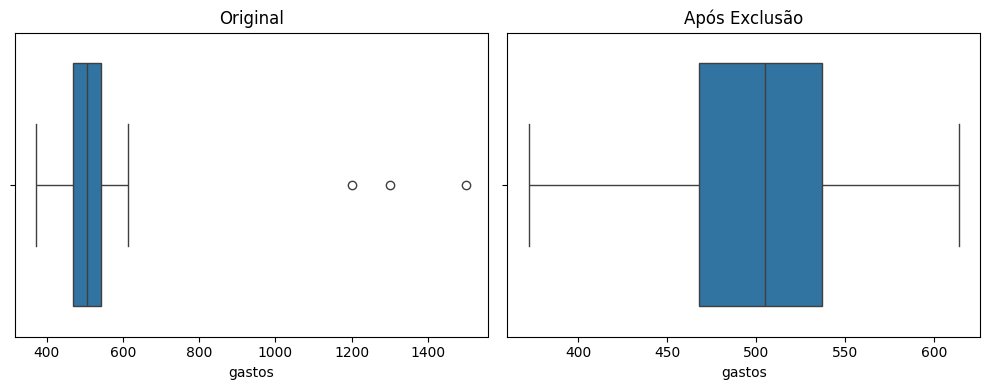

In [16]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['gastos'])
plt.title('Original')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_excluido['gastos'])
plt.title('Após Exclusão')
plt.tight_layout()
plt.show()

## ✅ Conclusão

- Outliers são valores extremos que merecem atenção
- Existem várias técnicas para detectá-los: Boxplot, IQR, Z-Score
- Você pode excluir ou substituir
- O importante é entender o **contexto** antes de tomar a decisão